In [ ]:
with open(input_dir / "vlm.jsonl", "r") as f:
    for line in f:
        if line.strip() == "":
            continue
        instance = json.loads(line.strip())
        with open(input_dir / "images" / instance["image"], "rb") as file:
            image_bytes = file.read()
            for annotation in instance["annotations"]:
                instances.append(
                    {
                        "key": counter,
                        "caption": annotation["caption"],
                        "b64": base64.b64encode(image_bytes).decode("ascii"),
                    }
                )
                truths.append(
                    {
                        "key": counter,
                        "caption": annotation["caption"],
                        "bbox": annotation["bbox"],
                    }
                )
                counter += 1

In [1]:
from VLMManager import VLMManager
import base64
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np

from io import BytesIO

vlm_manager = VLMManager()


0: 640x640 1 black and yellow drone, 1 grey cargo aircraft, 1 white and orange light aircraft, 115.8ms
Speed: 2.6ms preprocess, 115.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


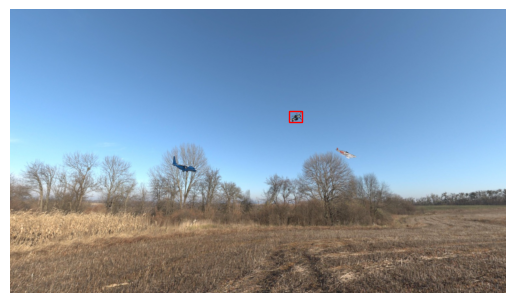

[853, 313, 42, 33]


In [7]:
# Load and preprocess the image
image_path = '/home/jupyter/til-24-base/derrick/dataset/images/train/image_1033.jpg'
# image_path = '/home/jupyter/til-24-base/derrick/example.jpg'
# image_path = '/home/jupyter/til-24-base/derrick/image_test.png'
caption = 'black drone'

with open(image_path, "rb") as file:
    image_bytes = file.read()

image_encoded = base64.b64encode(image_bytes).decode("ascii")
image_input = base64.b64decode(image_encoded)

# Display the image using Matplotlib
image = mpimg.imread(BytesIO(image_input), format='jpg')
bbox = vlm_manager.identify(image_input, caption)

# Create a plot
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch if bbox is not empty
if bbox:
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.axis('off')  # Hide axes
plt.show()

print(bbox)